## Lesson 4. Understand EPSG, WKT, and Other CRS Definition Styles

Import the worldBoundary layer to explore the CRS

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import earthpy as et

In [3]:
data_path = et.data.get_data('spatial-vector-lidar')

In [4]:
worldBound_path = os.path.join(data_path,
                               'global',
                               'ne_110m_land',
                               'ne_110m_land.shp')
worldBound = gpd.read_file(worldBound_path)
worldBound.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

**How to create a CRS object in Python**

1. Manually create an array for a single x,y point
2. Turn that x,y point into a shapely object
3. Convert that shapely point into a GeoDataFrame

In [5]:
boulder_xy = np.array([[476911.31, 4429455.35]])
boulder_xy

array([[ 476911.31, 4429455.35]])

In [6]:
boulder_xy.shape

(1, 2)

In [7]:
boulder_xy_pt = [Point(xy) for xy in boulder_xy]
boulder_xy_pt

In [8]:
dir(boulder_xy_pt)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

In [9]:
boulder_loc = gpd.GeoDataFrame(boulder_xy_pt,
                               columns=['geometry'],
                               crs='epsg:2957')
boulder_loc.crs

<Projected CRS: EPSG:2957>
Name: NAD83(CSRS) / UTM zone 13N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Canada - 108°W to 102°W
- bounds: (-108.0, 48.99, -102.0, 84.0)
Coordinate Operation:
- name: UTM zone 13N
- method: Transverse Mercator
Datum: NAD83 Canadian Spatial Reference System
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

#### Practice GeoPandas: Import Line & Polygon Shapes

In [10]:
data_path

'C:\\Users\\Glen Shennan\\earth-analytics\\data\\spatial-vector-lidar\\.'

In [11]:
sjer_roads = gpd.read_file(os.path.join(data_path.strip('.'),
                                        'california',
                                        'madera-county-roads',
                                        'tl_2013_06039_roads.shp'))

In [12]:
sjer_crop_extent = gpd.read_file(os.path.join(data_path.strip('.'),
                                              'california',
                                              'neon-sjer-site',
                                              'vector_data',
                                              'SJER_crop.shp'))                                             

In [13]:
type(sjer_roads)

geopandas.geodataframe.GeoDataFrame

In [14]:
type(sjer_crop_extent)

geopandas.geodataframe.GeoDataFrame

In [15]:
sjer_roads.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

(Above) EPSG 4269 = NAD83

In [16]:
sjer_crop_extent.crs

<Projected CRS: EPSG:32611>
Name: WGS 84 / UTM zone 11N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World - N hemisphere - 120°W to 114°W - by country
- bounds: (-120.0, 0.0, -114.0, 84.0)
Coordinate Operation:
- name: UTM zone 11N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

(Above) EPSG 32611 = WGS 84 / UTM zone 11N

In [17]:
sjer_roads

,LINEARID,FULLNAME,RTTYP,MTFCC,geometry
0,110454239066,N 14th St,M,S1400,"LINESTRING (-120.27227 37.11615, -120.27244 37..."
1,110454239052,N 11th St,M,S1400,"LINESTRING (-120.26788 37.11667, -120.26807 37..."
2,110454239056,N 12th St,M,S1400,"LINESTRING (-120.27053 37.11749, -120.27045 37..."
3,110454239047,N 10th St,M,S1400,"LINESTRING (-120.26703 37.11735, -120.26721 37..."
4,110454243091,N Westberry Blvd,M,S1400,"LINESTRING (-120.10122 36.96524, -120.10123 36..."
...,...,...,...,...,...
9635,110454244324,Kings Canyon Ct N,M,S1400,"LINESTRING (-119.77493 37.18221, -119.77481 37..."
9636,110454242718,Gold Dust Ct N,M,S1400,"LINESTRING (-119.71746 37.23623, -119.71739 37..."
9637,110454243105,Whitworth Dr N,M,S1400,"LINESTRING (-120.08446 37.01512, -120.08440 37..."
9638,110454241750,Cascadel Dr N,M,S1400,"LINESTRING (-119.45740 37.22955, -119.45721 37..."


In [18]:
sjer_roads.total_bounds

array([-120.530241,   36.771309, -119.031075,   37.686847])

In [19]:
sjer_crop_extent.total_bounds

array([ 254570.567     , 4107303.07684455,  258867.40933092,
       4112361.92026107])

In [20]:
sjer_crop_extent['geometry']

0    POLYGON ((254570.567 4112361.920, 258867.409 4...
Name: geometry, dtype: geometry

In [21]:
sjer_roads.geom_type

0       LineString
1       LineString
2       LineString
3       LineString
4       LineString
           ...    
9635    LineString
9636    LineString
9637    LineString
9638    LineString
9639    LineString
Length: 9640, dtype: object

In [22]:
sjer_crop_extent.geom_type

0    Polygon
dtype: object

In [23]:
type(sjer_roads)

geopandas.geodataframe.GeoDataFrame

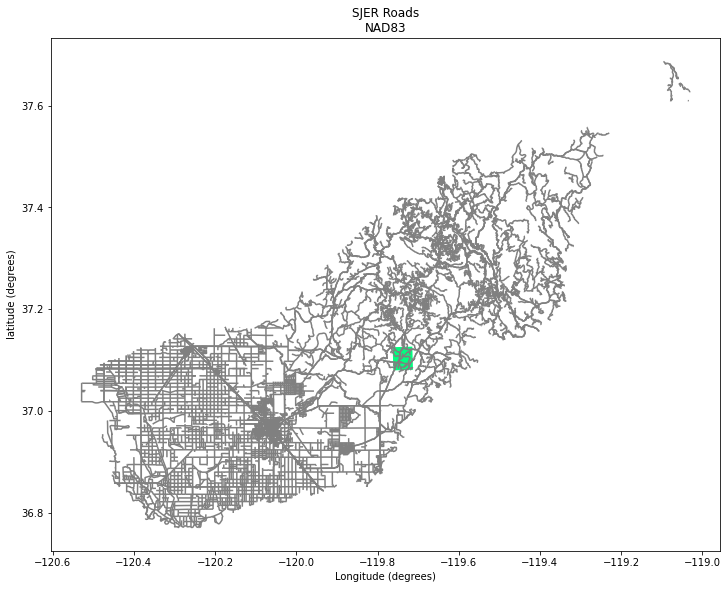

In [25]:
fig, ax = plt.subplots(figsize=(12,12))

sjer_roads.plot(ax=ax,
                color='grey')
sjer_crop_extent.to_crs(crs=sjer_roads.crs).plot(ax=ax,
                                                 color='springgreen')
ax.set(title='SJER Roads\nNAD83',
       xlabel='Longitude (degrees)',
       ylabel='latitude (degrees)')
plt.show()